72.75042724609375


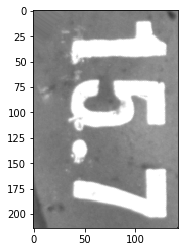

101.0093994140625


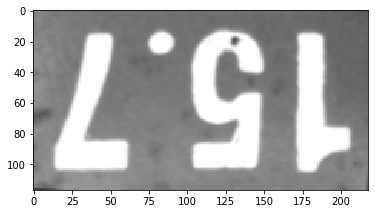

98.4621810913086


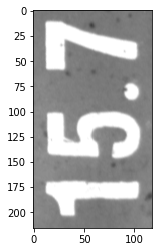

In [1]:
## 1st step

import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
image = cv2.imread('/home/nice/Downloads/10slot/ImgMon Dec 30 155649 2019_15.1.bmp')
image=image[110:800,300:1000]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
t = cv2.threshold(blurred, 0, 100, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# t=cv2.threshold(blurred,127,255,cv2.THRESH_BINARY_INV)[1]
edged = cv2.Canny(t, 1, 100, 255)

dilation = cv2.dilate(edged, kernel, iterations =12)

cnts = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
# cnts= sorted(cnts, key=lambda cnt: cv2.boundingRect(cnt)[0])
img_area = image.shape[0]*image.shape[1]
mult = 1
idx=1
images_3=[]
for cnt in cnts[0:]:
    area=cv2.contourArea(cnt)
    if area>=17500 and area < 30000:
#     if area>=1000:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
#         cv2.drawContours(image, [box], 0, (0,255,0), 2) # this was mostly for debugging you may omit

        W = rect[1][0]
        H = rect[1][1]
        if abs(W-H)>=65:
            print(abs(W-H))
            Xs = [i[0] for i in box]
            Ys = [i[1] for i in box]
            x1 = min(Xs)
            x2 = max(Xs)
            y1 = min(Ys)
            y2 = max(Ys)

            rotated = False
            angle = rect[2]

            if angle < -45:
                angle+=90
                rotated = True

            center = (int((x1+x2)/2), int((y1+y2)/2))
            size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
    #         cv2.circle(image, center, 10, (0,255,0), -1) #again this was mostly for debugging purposes

            M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

            cropped = cv2.getRectSubPix(image, size, center)    
            cropped = cv2.warpAffine(cropped, M, size)

            croppedW = W if not rotated else H 
            croppedH = H if not rotated else W

            croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW*mult), int(croppedH*mult)), (size[0]/2, size[1]/2))
            cv2.imwrite(str(idx)+'.jpg', croppedRotated)
            idx+=1
            images_3.append(croppedRotated)
            plt.imshow(croppedRotated)
            plt.show()

# plt.imshow(dilation)
# plt.show()

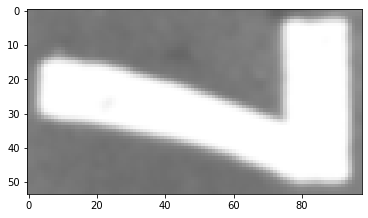

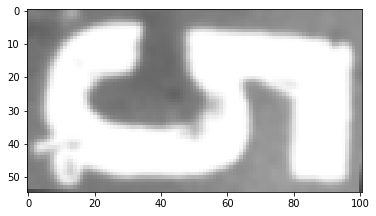

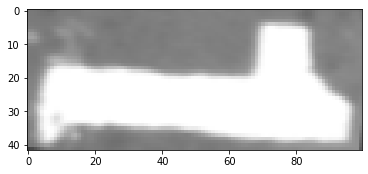

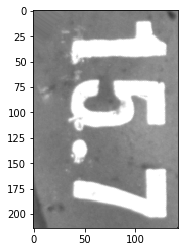

In [7]:
## Step 2
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
image=images_3[0]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
t = cv2.threshold(blurred, 0, 100, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# t=cv2.threshold(blurred,127,255,cv2.THRESH_BINARY_INV)[1]
edged = cv2.Canny(t, 1, 100, 255)

dilation = cv2.dilate(edged, kernel, iterations =3)

cnts = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# cnts = sorted(cnts, key=None, reverse=True)
# cnts= sorted(cnts, key=lambda cnt: cv2.boundingRect(cnt)[0])
img_area = image.shape[0]*image.shape[1]
mult = 1
idx=1
images_digit=[]
for cnt in cnts[0:]:
    area=cv2.contourArea(cnt)
    if area>=2500:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
#         cv2.drawContours(image, [box], 0, (0,255,0), 2) # this was mostly for debugging you may omit

        W = rect[1][0]
        H = rect[1][1]

        Xs = [i[0] for i in box]
        Ys = [i[1] for i in box]
        x1 = min(Xs)
        x2 = max(Xs)
        y1 = min(Ys)
        y2 = max(Ys)

        rotated = False
        angle = rect[2]

        if angle < -45:
            angle+=90
            rotated = True

        center = (int((x1+x2)/2), int((y1+y2)/2))
        size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
#         cv2.circle(image, center, 10, (0,255,0), -1) #again this was mostly for debugging purposes

        M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

        cropped = cv2.getRectSubPix(image, size, center)    
        cropped = cv2.warpAffine(cropped, M, size)

        croppedW = W if not rotated else H 
        croppedH = H if not rotated else W

        croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW*mult), int(croppedH*mult)), (size[0]/2, size[1]/2))
#         cv2.imwrite(str(idx)+'.jpg', croppedRotated)
#         idx+=1
        images_digit.append(croppedRotated)
        plt.imshow(croppedRotated)
        plt.show()

plt.imshow(image)
plt.show()

In [8]:
import numpy as np
import cv2
import tensorflow as tf 
import tensorflow as tf
model = tf.keras.models.load_model('/home/nice/Downloads/cnn_classifier(1).h5')
def cnnCharRecognition(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

    blackAndWhiteChar=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(blackAndWhiteChar, (5, 5), 0)
    t=cv2.threshold(blurred,175,255,cv2.THRESH_BINARY)[1]
    erode=cv2.erode(t, kernel, iterations =4)
    blackAndWhiteChar = cv2.resize(erode,(28,28))
    image = blackAndWhiteChar.reshape((1, 28,28,1))
    image = image / 255.0
    new_predictions = model.predict(image)
    pre=sorted(range(len(new_predictions[0])), key=lambda i: new_predictions[0][i],
               reverse=True)[:2]
    return (pre)



15.7Kg


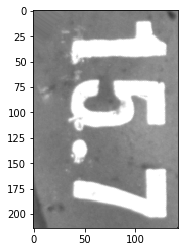

In [9]:
detected_no=[]
for i in range(len(images_digit)):
    detected_no.append(cnnCharRecognition(images_digit[i]))

final_no=['1']

second=detected_no[1]#(5,6)
if second[0]==6 or second[0]==5 :
#     print(second[1])
    final_no.append(second[0])
else:
#     print('somthing is wrong')
    final_no.append(second[1])
    
third=detected_no[2]#(7,8,9)
if third[0]==7 or third[0]==8 or third[0]==9:
#     print(third[0])
    final_no.append(third[0])
else:
#     print(third[2])
    final_no.append(third[1])
no=[]  
for i in final_no: 
    no.extend(str(i)) 
no.insert(2,'.')
l=''.join(no)
print(f'{l}Kg')
plt.imshow(image)
plt.show()